# Spark

In [3]:
from pyspark.sql.types import Row
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark import SparkContext
from datetime import datetime

In [4]:
sc = SparkContext("local", "First App")
ss = SparkSession.builder.master("local").config(conf=SparkConf()).getOrCreate()

In [5]:
simple_data = sc.parallelize([1, "Alice", 50])
simple_data.count()

3

In [6]:
simple_data.collect()

[1, 'Alice', 50]

In [7]:
records = sc.parallelize([[1, "Alice", 50], [2, "Bob", 80]])
records.collect()

[[1, 'Alice', 50], [2, 'Bob', 80]]

In [10]:
df = ss.createDataFrame([[1, "a"], [2, "b"], [3, "c"], [4, "d"], [5, "e"]], ['ind', "state"])
df.show()

+---+-----+
|ind|state|
+---+-----+
|  1|    a|
|  2|    b|
|  3|    c|
|  4|    d|
|  5|    e|
+---+-----+



In [12]:
data = sc.parallelize([Row(id=1,
                           name="Alice",
                           score=50)])
data.collect()

[Row(id=1, name='Alice', score=50)]

In [13]:
df = data.toDF()
df.show()

+---+-----+-----+
| id| name|score|
+---+-----+-----+
|  1|Alice|   50|
+---+-----+-----+



In [14]:
data = sc.parallelize([Row(
                           id=1,
                           name="Alice",
                           score=50
                        ),
                        Row(
                            id=2,
                            name="Bob",
                            score=80
                        ),
                        Row(
                            id=3,
                            name="Charlee",
                            score=75
                        )])

df = data.toDF()
df.show()

+---+-------+-----+
| id|   name|score|
+---+-------+-----+
|  1|  Alice|   50|
|  2|    Bob|   80|
|  3|Charlee|   75|
+---+-------+-----+



In [15]:
complex_data = sc.parallelize([Row(
                                col_float=1.44,
                                col_integer=10,
                                col_string="John")
                           ])
complex_data_df = complex_data.toDF()
complex_data_df.show()

+---------+-----------+----------+
|col_float|col_integer|col_string|
+---------+-----------+----------+
|     1.44|         10|      John|
+---------+-----------+----------+



In [16]:
complex_data = sc.parallelize([Row(
                                col_float=1.44, 
                                col_integer=10, 
                                col_string="John", 
                                col_boolean=True, 
                                col_list=[1, 2, 3])
                           ])
complex_data_df = complex_data.toDF()
complex_data_df.show()

+-----------+---------+-----------+---------+----------+
|col_boolean|col_float|col_integer| col_list|col_string|
+-----------+---------+-----------+---------+----------+
|       true|     1.44|         10|[1, 2, 3]|      John|
+-----------+---------+-----------+---------+----------+



In [17]:
complex_data = sc.parallelize([Row(
                                col_list = [1, 2, 3],
                                col_dict = {"k1": 0},
                                col_row = Row(a=10, b=20, c=30),
                                col_time = datetime(2014, 8, 1, 14, 1, 5)
                            ),              
                            Row(
                                col_list = [1, 2, 3, 4, 5], 
                                col_dict = {"k1": 0,"k2": 1 }, 
                                col_row = Row(a=40, b=50, c=60),
                                col_time = datetime(2014, 8, 2, 14, 1, 6)
                            ),
                            Row(
                                col_list = [1, 2, 3, 4, 5, 6, 7], 
                                col_dict = {"k1": 0, "k2": 1, "k3": 2 }, 
                                col_row = Row(a=70, b=80, c=90),
                                col_time = datetime(2014, 8, 3, 14, 1, 7)
                            )]) 
complex_data_df = complex_data.toDF()
complex_data_df.show()

+--------------------+--------------------+------------+-------------------+
|            col_dict|            col_list|     col_row|           col_time|
+--------------------+--------------------+------------+-------------------+
|           [k1 -> 0]|           [1, 2, 3]|[10, 20, 30]|2014-08-01 14:01:05|
|  [k1 -> 0, k2 -> 1]|     [1, 2, 3, 4, 5]|[40, 50, 60]|2014-08-02 14:01:06|
|[k3 -> 2, k1 -> 0...|[1, 2, 3, 4, 5, 6...|[70, 80, 90]|2014-08-03 14:01:07|
+--------------------+--------------------+------------+-------------------+



# Exploring and analyzing data with DataFrames

In [19]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Analyzing London crime data") \
    .getOrCreate()

In [21]:
data = spark.read\
            .format("csv")\
            .option("header", "true")\
            .load("data/london_crime_by_lsoa_small.csv")

In [22]:
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [23]:
data.count()

83

In [24]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [25]:
data.dropna()
data = data.drop("lsoa_code")
data.show(5)

+----------+--------------------+--------------------+-----+----+-----+
|   borough|      major_category|      minor_category|value|year|month|
+----------+--------------------+--------------------+-----+----+-----+
|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+----------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [27]:
total_boroughs = data.select('borough').distinct()
total_boroughs.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|         Westminster|
|             Hackney|
|           Southwark|
+--------------------+
only showing top 20 rows



In [28]:
hackney_data = data.filter(data['borough'] == "Hackney")
hackney_data.show(5)

+-------+--------------------+--------------------+-----+----+-----+
|borough|      major_category|      minor_category|value|year|month|
+-------+--------------------+--------------------+-----+----+-----+
|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
+-------+--------------------+--------------------+-----+----+-----+



In [29]:
data_2015_2016 = data.filter(data['year'].isin(["2015", "2016"]))
data_2015_2016.sample(fraction=0.1).show()

+----------+------------------+--------------------+-----+----+-----+
|   borough|    major_category|      minor_category|value|year|month|
+----------+------------------+--------------------+-----+----+-----+
| Redbridge|          Burglary|Burglary in Other...|    0|2016|    3|
|Hillingdon|Theft and Handling|Theft/Taking Of M...|    0|2016|    2|
+----------+------------------+--------------------+-----+----+-----+



In [30]:
data_2014_onwards = data.filter(data['year'] >= 2014 )
data_2014_onwards.sample(fraction=0.1).show()

+--------+----------------+------------------+-----+----+-----+
| borough|  major_category|    minor_category|value|year|month|
+--------+----------------+------------------+-----+----+-----+
|Havering|Fraud or Forgery|Counted per Victim|    0|2015|   11|
+--------+----------------+------------------+-----+----+-----+



In [31]:
borough_conviction_sum = data.groupBy('borough').agg({"value":"sum"}).withColumnRenamed("sum(value)","convictions")
borough_conviction_sum.show(5)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|        1.0|
|          Wandsworth|        0.0|
|              Bexley|        1.0|
|             Lambeth|        2.0|
|Barking and Dagenham|        1.0|
+--------------------+-----------+
only showing top 5 rows



In [32]:
total_borough_convictions = borough_conviction_sum.agg({"convictions":"sum"})
total_borough_convictions.show()

+----------------+
|sum(convictions)|
+----------------+
|            23.0|
+----------------+



In [33]:
import pyspark.sql.functions as func

In [35]:
total_convictions = total_borough_convictions.collect()[0][0]
borough_percentage_contribution = borough_conviction_sum.withColumn(
    "% contribution",
    func.round(borough_conviction_sum.convictions / total_convictions * 100, 2))

borough_percentage_contribution.printSchema()

root
 |-- borough: string (nullable = true)
 |-- convictions: double (nullable = true)
 |-- % contribution: double (nullable = true)



In [36]:
borough_percentage_contribution.orderBy(borough_percentage_contribution[2].desc())\
                               .show(10)

+--------------------+-----------+--------------+
|             borough|convictions|% contribution|
+--------------------+-----------+--------------+
|           Southwark|        4.0|         17.39|
|              Newham|        3.0|         13.04|
|              Ealing|        2.0|           8.7|
|            Haringey|        2.0|           8.7|
|            Hounslow|        2.0|           8.7|
|             Lambeth|        2.0|           8.7|
|              Sutton|        2.0|           8.7|
|Barking and Dagenham|        1.0|          4.35|
|             Hackney|        1.0|          4.35|
|              Bexley|        1.0|          4.35|
+--------------------+-----------+--------------+
only showing top 10 rows



In [37]:
conviction_monthly = data.filter(data['year'] == 2014)\
                         .groupBy('month')\
                         .agg({"value":"sum"})\
                         .withColumnRenamed("sum(value)","convictions")
total_conviction_monthly = conviction_monthly.agg({"convictions":"sum"})\
                                             .collect()[0][0]

total_conviction_monthly = conviction_monthly\
    .withColumn("percent",
                func.round(conviction_monthly.convictions/total_conviction_monthly * 100, 2))
total_conviction_monthly.columns

['month', 'convictions', 'percent']

In [38]:
total_conviction_monthly.orderBy(total_conviction_monthly.percent.desc()).show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|    5|        1.0|  100.0|
|    3|        0.0|    0.0|
|    9|        0.0|    0.0|
|    6|        0.0|    0.0|
|    1|        0.0|    0.0|
+-----+-----------+-------+



In [39]:
crimes_category = data.groupBy('major_category')\
                      .agg({"value":"sum"})\
                      .withColumnRenamed("sum(value)","convictions")
crimes_category.orderBy(crimes_category.convictions.desc()).show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|       11.0|
|Violence Against ...|        8.0|
|             Robbery|        3.0|
|     Criminal Damage|        1.0|
|               Drugs|        0.0|
|    Fraud or Forgery|        0.0|
|            Burglary|        0.0|
|Other Notifiable ...|        0.0|
+--------------------+-----------+



In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [41]:
def describe_year(year):
    yearly_details = data.filter(data.year == year)\
                         .groupBy('borough')\
                         .agg({'value':'sum'})\
                         .withColumnRenamed("sum(value)","convictions")
    
    borough_list = [x[0] for x in yearly_details.toLocalIterator()]
    convictions_list = [x[1] for x in yearly_details.toLocalIterator()]
  
    plt.figure(figsize=(33, 10)) 
    plt.bar(borough_list, convictions_list)
    
    plt.title('Crime for the year: ' + year, fontsize=30)
    plt.xlabel('Boroughs',fontsize=30)
    plt.ylabel('Convictions', fontsize=30)

    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    plt.show()

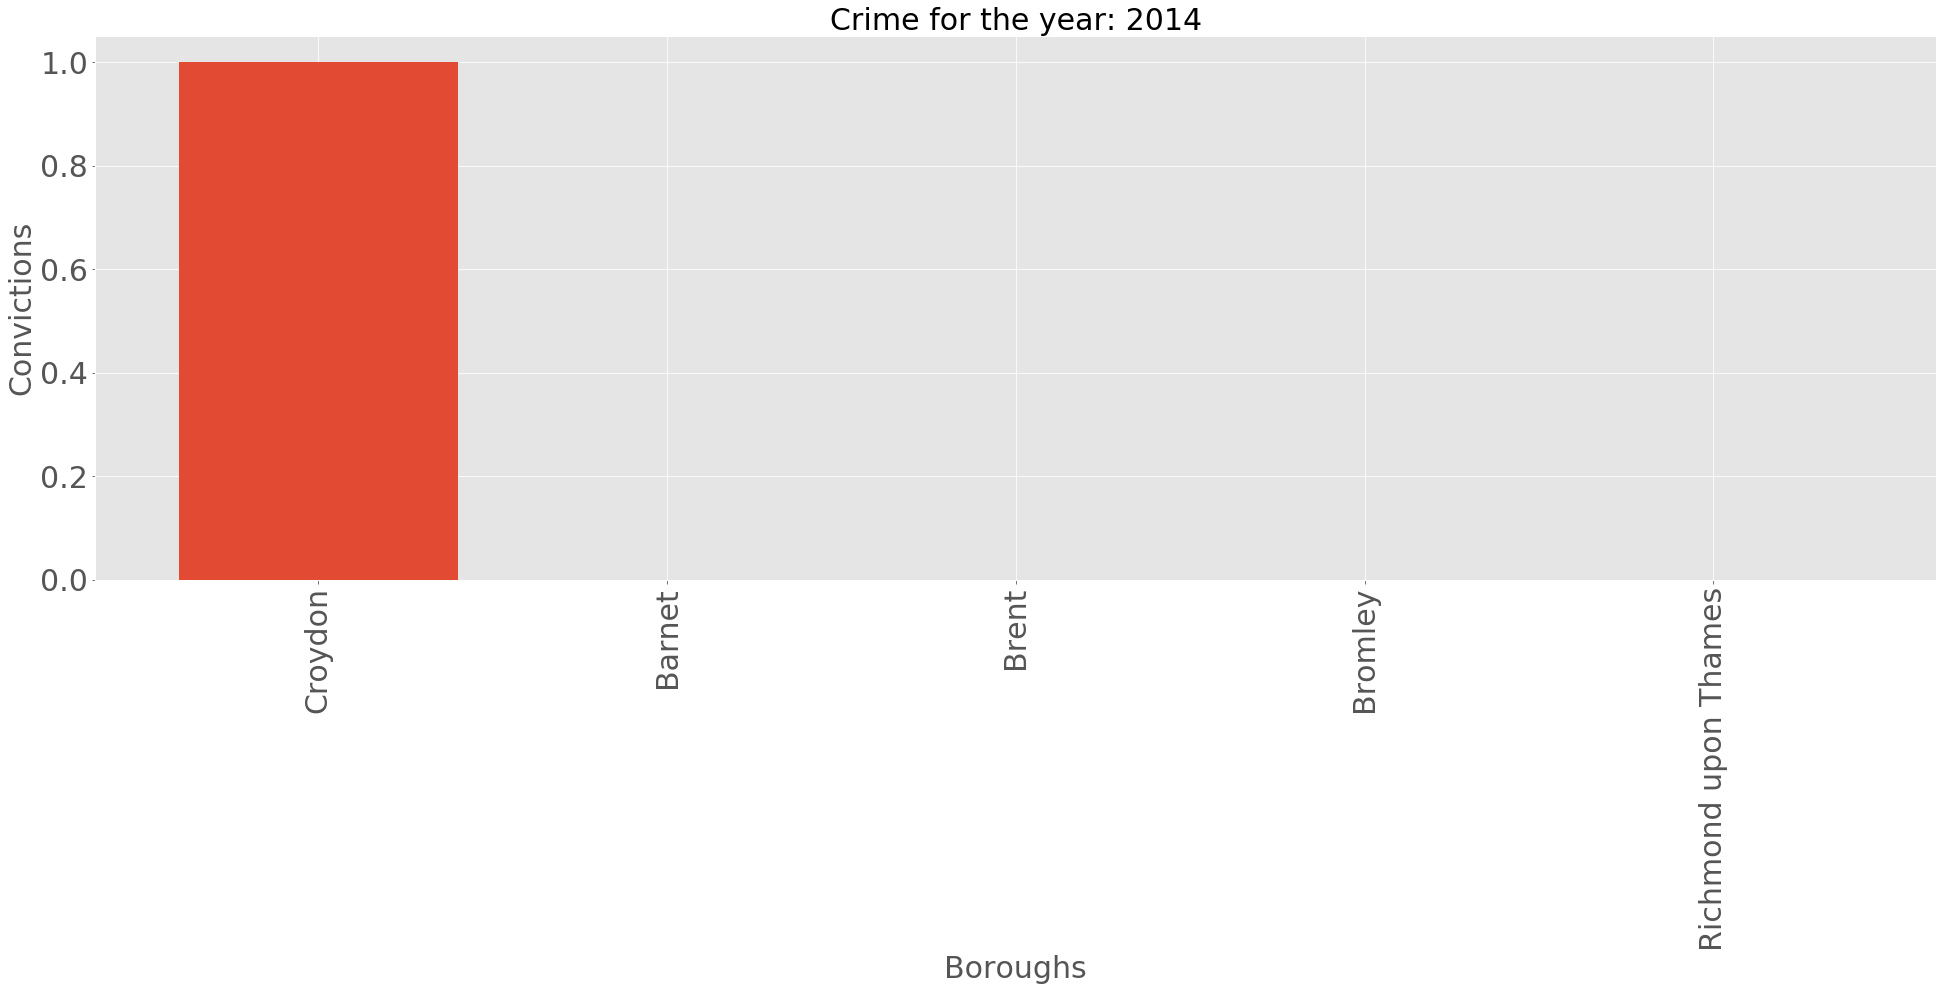

In [42]:
describe_year('2014')

# Querying data using Spark SQL

In [43]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Analyzing airline data") \
    .getOrCreate()

In [44]:
from pyspark.sql.types import Row
from datetime import datetime

In [45]:
record = sc.parallelize([Row(id = 1,
                             name = "Jill",
                             active = True,
                             clubs = ['chess', 'hockey'],
                             subjects = {"math": 80, 'english': 56},
                             enrolled = datetime(2014, 8, 1, 14, 1, 5)),
                         Row(id = 2,
                             name = "George",
                             active = False,
                             clubs = ['chess', 'soccer'],
                             subjects = {"math": 60, 'english': 96},
                             enrolled = datetime(2015, 3, 21, 8, 2, 5))
])

In [46]:
record_df = record.toDF()
record_df.show()

+------+---------------+-------------------+---+------+--------------------+
|active|          clubs|           enrolled| id|  name|            subjects|
+------+---------------+-------------------+---+------+--------------------+
|  true|[chess, hockey]|2014-08-01 14:01:05|  1|  Jill|[english -> 56, m...|
| false|[chess, soccer]|2015-03-21 08:02:05|  2|George|[english -> 96, m...|
+------+---------------+-------------------+---+------+--------------------+



In [51]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
record_df.createOrReplaceTempView("records")
all_records_df = sqlContext.sql('SELECT * FROM records')
all_records_df.show()

+------+---------------+-------------------+---+------+--------------------+
|active|          clubs|           enrolled| id|  name|            subjects|
+------+---------------+-------------------+---+------+--------------------+
|  true|[chess, hockey]|2014-08-01 14:01:05|  1|  Jill|[english -> 56, m...|
| false|[chess, soccer]|2015-03-21 08:02:05|  2|George|[english -> 96, m...|
+------+---------------+-------------------+---+------+--------------------+



In [52]:
sqlContext.sql('SELECT id, NOT active FROM records').show()

+---+------------+
| id|(NOT active)|
+---+------------+
|  1|       false|
|  2|        true|
+---+------------+



In [53]:
sqlContext.sql('SELECT * FROM records where subjects["english"] > 90').show()

+------+---------------+-------------------+---+------+--------------------+
|active|          clubs|           enrolled| id|  name|            subjects|
+------+---------------+-------------------+---+------+--------------------+
| false|[chess, soccer]|2015-03-21 08:02:05|  2|George|[english -> 96, m...|
+------+---------------+-------------------+---+------+--------------------+



In [54]:
record_df.createGlobalTempView("global_records")
sqlContext.sql('SELECT * FROM global_temp.global_records').show()

+------+---------------+-------------------+---+------+--------------------+
|active|          clubs|           enrolled| id|  name|            subjects|
+------+---------------+-------------------+---+------+--------------------+
|  true|[chess, hockey]|2014-08-01 14:01:05|  1|  Jill|[english -> 56, m...|
| false|[chess, soccer]|2015-03-21 08:02:05|  2|George|[english -> 96, m...|
+------+---------------+-------------------+---+------+--------------------+



In [55]:
spark = SparkSession \
    .builder \
    .appName("Inferred and explicit schemas") \
    .getOrCreate()
lines = sc.textFile("data/students.txt")

In [56]:
lines.collect()

['Emily,44,55,78', 'Andy,47,34,89', 'Rick,55,78,55', 'Aaron,66,34,98']

In [57]:
parts = lines.map(lambda l: l.split(","))
parts.collect()

[['Emily', '44', '55', '78'],
 ['Andy', '47', '34', '89'],
 ['Rick', '55', '78', '55'],
 ['Aaron', '66', '34', '98']]

In [58]:
students = parts.map(lambda p: Row(name=p[0], math=int(p[1]), english=int(p[2]), science=int(p[3])))
students.collect()

[Row(english=55, math=44, name='Emily', science=78),
 Row(english=34, math=47, name='Andy', science=89),
 Row(english=78, math=55, name='Rick', science=55),
 Row(english=34, math=66, name='Aaron', science=98)]

In [59]:
schemaStudents = spark.createDataFrame(students)
schemaStudents.createOrReplaceTempView("students")
schemaStudents.columns

['english', 'math', 'name', 'science']

In [60]:
spark.sql("SELECT * FROM students").show()

+-------+----+-----+-------+
|english|math| name|science|
+-------+----+-----+-------+
|     55|  44|Emily|     78|
|     34|  47| Andy|     89|
|     78|  55| Rick|     55|
|     34|  66|Aaron|     98|
+-------+----+-----+-------+



In [61]:
parts.collect()

[['Emily', '44', '55', '78'],
 ['Andy', '47', '34', '89'],
 ['Rick', '55', '78', '55'],
 ['Aaron', '66', '34', '98']]

In [62]:
schemaString = "name math english science"
from pyspark.sql.types import StructType, StructField, StringType, LongType

fields = [StructField('name', StringType(), True),
          StructField('math', LongType(), True),
          StructField('english', LongType(), True),
          StructField('science', LongType(), True),
]
schema = StructType(fields)
schemaStudents = spark.createDataFrame(parts, schema)
schemaStudents.columns
spark.sql("SELECT * FROM students").show()

+-------+----+-----+-------+
|english|math| name|science|
+-------+----+-----+-------+
|     55|  44|Emily|     78|
|     34|  47| Andy|     89|
|     78|  55| Rick|     55|
|     34|  66|Aaron|     98|
+-------+----+-----+-------+



In [63]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Window functions") \
    .getOrCreate()

In [64]:
products = spark.read\
                .format("csv")\
                .option("header", "true")\
                .load('data/products.csv')
products.show()

+----------+--------+-----+
|   product|category|price|
+----------+--------+-----+
|Samsung TX|  Tablet|  999|
|Samsung JX|  Mobile|  799|
|Redmi Note|  Mobile|  399|
|        Mi|  Mobile|  299|
|      iPad|  Tablet|  789|
|    iPhone|  Mobile|  999|
|  Micromax|  Mobile|  249|
|    Lenovo|  Tablet|  499|
|   OnePlus|  Mobile|  356|
|        Xu|  Tablet|  267|
+----------+--------+-----+



In [65]:
import sys
from pyspark.sql.window import Window
import pyspark.sql.functions as func

windowSpec1 = Window.partitionBy(products['category']).orderBy(products['price'].desc())
price_rank = (func.rank().over(windowSpec1))
product_rank = products.select(
        products['product'],
        products['category'],
        products['price']
).withColumn('rank', func.rank().over(windowSpec1))

product_rank.show()

+----------+--------+-----+----+
|   product|category|price|rank|
+----------+--------+-----+----+
|    iPhone|  Mobile|  999|   1|
|Samsung JX|  Mobile|  799|   2|
|Redmi Note|  Mobile|  399|   3|
|   OnePlus|  Mobile|  356|   4|
|        Mi|  Mobile|  299|   5|
|  Micromax|  Mobile|  249|   6|
|Samsung TX|  Tablet|  999|   1|
|      iPad|  Tablet|  789|   2|
|    Lenovo|  Tablet|  499|   3|
|        Xu|  Tablet|  267|   4|
+----------+--------+-----+----+



In [66]:
windowSpec2 = Window.partitionBy(products['category']).orderBy(products['price'].desc()).rowsBetween(-1, 0)
price_max = (func.max(products['price']).over(windowSpec2))
products.select(
    products['product'],
    products['category'],
    products['price'],
    price_max.alias("price_max")).show()

+----------+--------+-----+---------+
|   product|category|price|price_max|
+----------+--------+-----+---------+
|    iPhone|  Mobile|  999|      999|
|Samsung JX|  Mobile|  799|      999|
|Redmi Note|  Mobile|  399|      799|
|   OnePlus|  Mobile|  356|      399|
|        Mi|  Mobile|  299|      356|
|  Micromax|  Mobile|  249|      299|
|Samsung TX|  Tablet|  999|      999|
|      iPad|  Tablet|  789|      999|
|    Lenovo|  Tablet|  499|      789|
|        Xu|  Tablet|  267|      499|
+----------+--------+-----+---------+

